In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)



In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
    


607

In [6]:
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bozeman
Processing Record 2 of Set 1 | boa vista
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | pitimbu
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | tuy hoa
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | mayaguez
Processing Record 13 of Set 1 | cazaje
City not found. Skipping...
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | tutayev
Processing Record 16 of Set 1 | hammerfest
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | lentekhi
Processing Record 20 of Set 1 | tabuk
Processing Record 21 of Set 1 | adrar
Processing Record 22 of Set 1 | mys shmidta
City not found. Skipping.

Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | kalinovskaya
Processing Record 41 of Set 4 | misratah
Processing Record 42 of Set 4 | mehamn
Processing Record 43 of Set 4 | tabou
Processing Record 44 of Set 4 | urucui
Processing Record 45 of Set 4 | abong mbang
Processing Record 46 of Set 4 | pevek
Processing Record 47 of Set 4 | kamenka
Processing Record 48 of Set 4 | morant bay
Processing Record 49 of Set 4 | sobradinho
Processing Record 50 of Set 4 | portland
Processing Record 1 of Set 5 | joshimath
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | culipapa
City not found. Skipping...
Processing Record 4 of Set 5 | killorglin
Processing Record 5 of Set 5 | ambovombe
Processing Record 6 of Set 5 | berlevag
Processing Record 7 of Set 5 | ust-maya
Processing Record 8 of Set 5 | rosia
Processing Record 9 of Set 5 | zhangye
Processing Record 10 of Set 5 | butaritari
Processing Record 11 of Set 5 | beringovskiy
Processing Record 12 of S

Processing Record 26 of Set 8 | jalu
Processing Record 27 of Set 8 | omsukchan
Processing Record 28 of Set 8 | waseca
Processing Record 29 of Set 8 | longlac
City not found. Skipping...
Processing Record 30 of Set 8 | udachnyy
Processing Record 31 of Set 8 | dunedin
Processing Record 32 of Set 8 | eldorado
Processing Record 33 of Set 8 | banda aceh
Processing Record 34 of Set 8 | arcata
Processing Record 35 of Set 8 | esperance
Processing Record 36 of Set 8 | torbay
Processing Record 37 of Set 8 | trat
Processing Record 38 of Set 8 | shache
Processing Record 39 of Set 8 | belmonte
Processing Record 40 of Set 8 | nangomba
Processing Record 41 of Set 8 | bow island
Processing Record 42 of Set 8 | alindao
Processing Record 43 of Set 8 | brumado
Processing Record 44 of Set 8 | itoman
Processing Record 45 of Set 8 | svetlaya
Processing Record 46 of Set 8 | entebbe
Processing Record 47 of Set 8 | kedrovyy
Processing Record 48 of Set 8 | itarema
Processing Record 49 of Set 8 | comodoro rivada

Processing Record 15 of Set 12 | tshane
Processing Record 16 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 12 | tigil
Processing Record 18 of Set 12 | primorsk
Processing Record 19 of Set 12 | nuqui
Processing Record 20 of Set 12 | the valley
Processing Record 21 of Set 12 | atbasar
Processing Record 22 of Set 12 | bad doberan
Processing Record 23 of Set 12 | khonuu
City not found. Skipping...
Processing Record 24 of Set 12 | waipawa
Processing Record 25 of Set 12 | thouars
Processing Record 26 of Set 12 | hondo
Processing Record 27 of Set 12 | abilene
Processing Record 28 of Set 12 | amapa
Processing Record 29 of Set 12 | acapulco
Processing Record 30 of Set 12 | burns lake
Processing Record 31 of Set 12 | touros
Processing Record 32 of Set 12 | maamba
Processing Record 33 of Set 12 | quimper
Processing Record 34 of Set 12 | buaran
Processing Record 35 of Set 12 | salalah
Processing Record 36 of Set 12 | nguruka
Processing Record 37 of Set 12 | cherepove

In [20]:
print(len(city_data))

563


In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bozeman,45.6796,-111.0386,2.79,81,100,1.99,US,2022-02-02 06:50:23
1,Boa Vista,2.8197,-60.6733,78.78,69,0,9.22,BR,2022-02-02 06:50:46
2,Hermanus,-34.4187,19.2345,73.80,78,1,11.43,ZA,2022-02-02 06:44:04
3,Bredasdorp,-34.5322,20.0403,74.28,83,0,4.61,ZA,2022-02-02 06:50:46
4,Airai,-8.9266,125.4092,73.33,57,73,4.83,TL,2022-02-02 06:45:17


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bozeman,US,2022-02-02 06:50:23,45.6796,-111.0386,2.79,81,100,1.99
1,Boa Vista,BR,2022-02-02 06:50:46,2.8197,-60.6733,78.78,69,0,9.22
2,Hermanus,ZA,2022-02-02 06:44:04,-34.4187,19.2345,73.80,78,1,11.43
3,Bredasdorp,ZA,2022-02-02 06:50:46,-34.5322,20.0403,74.28,83,0,4.61
4,Airai,TL,2022-02-02 06:45:17,-8.9266,125.4092,73.33,57,73,4.83
...,...,...,...,...,...,...,...,...,...
558,Hosakote,IN,2022-02-02 07:05:26,14.2769,77.1699,84.88,27,0,3.15
559,Gobabis,NA,2022-02-02 07:05:26,-22.4500,18.9667,71.10,73,93,8.46
560,Grand Baie,MU,2022-02-02 07:05:26,-20.0182,57.5802,83.44,77,100,18.01
561,Krasnoselkup,RU,2022-02-02 07:05:27,65.7000,82.4667,-10.52,100,100,2.80


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

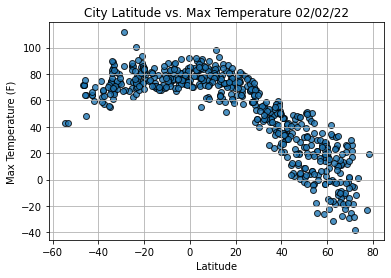

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

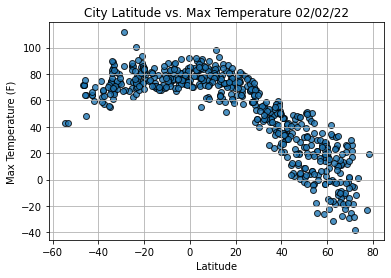

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

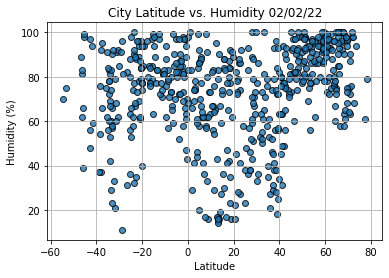

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

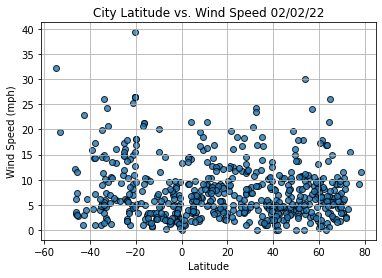

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()